<a href="https://colab.research.google.com/github/MusaibSyd/Machine-learning/blob/main/Logistic_Regression_Hearing_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


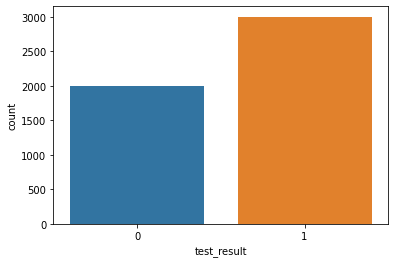

In [6]:
sns.countplot(df['test_result'])

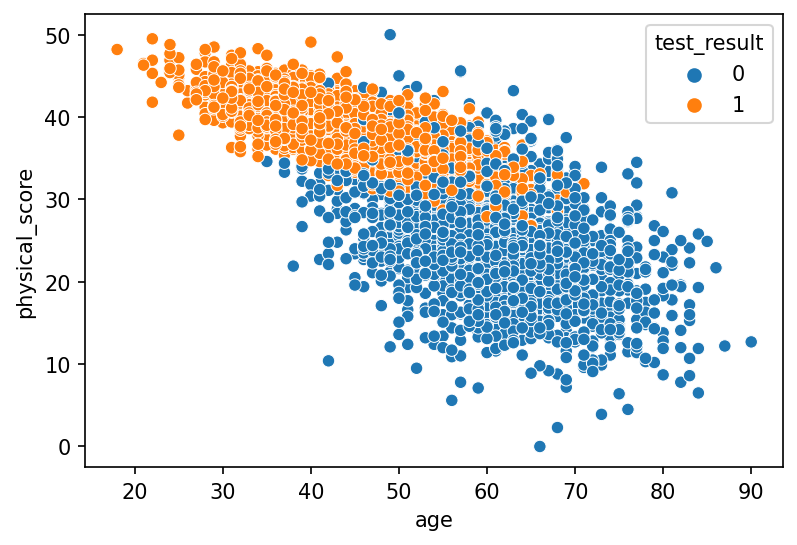

In [8]:
plt.figure(dpi=150)
sns.scatterplot(x='age',
                y='physical_score',
                data=df,
                hue='test_result')

In [11]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression()

In [19]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [20]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [21]:
y_pred = log_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
print(accuracy_score(y_test,y_pred))

0.93


In [27]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

